Created on July 5th, 2022

Last edit on July 7th, 2022

# Estimation of effective tunneling in 1D lattice shaken by phase modulation

<div style="text-align: right;">
<font size="4">Editor: Hideki Ozawa</font>
</div>

---

Reference.)

[1] [A.Zenesini *et. al.*, "Tunneling control and localization for Bose-Einstein condensates in a frequency modulated optical lattice
", arXiv (2009)](https://arxiv.org/abs/0912.1241)

The expression for the phase modulation for 1D lattice:
\begin{equation}
\delta \phi_1 (t) = -\phi_0 {\rm cos}(\Omega t).
\end{equation}
The dimensionless forcing amplitude $K_0$is given by
\begin{equation}
K_0 = \frac{m \Omega a_{\rm 1D}^2}{\hbar}\frac{\phi_0}{2 \pi},
\end{equation}
where $m$ is the atom mass, $a_{\rm 1D}$ the lattice constant, $\hbar$ the reduced Plank constant, respectively.  
The notation of the effective tunneling:
\begin{equation}
J_{\rm eff} = {\rm J}_{B0}(K_0) J_{\rm bare},
\end{equation}
where $ {\rm J}_{B0}(K_0)$ is the 0-th order Bessel function of the 1st kind.

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
from scipy.special import jv

In [2]:
print(constants.h)
mrb = 87*1.66053873*10**(-27) #[kg] Single atom mass of 87Rb
print(1/constants.N_A*10**(-3))
wavelength = 1064*1e-9 #[m] wavelength of lattice beam
dl=1/np.sqrt(3)*wavelength #[m] lattice constants [m]

6.62607015e-34
1.6605390671738466e-27


In [3]:
controlVoltageToAM = 8 #[V] control voltage from NI-DAQ to WF1968 mod. in via buffer amp
modulationSignalVpp = 5 #[V] Amplitude of modulation singal
bufferAmpForAM = 1/8 # gain of buffer amp for modulatin sinal
PMdeviation = 360 #[degree] FM deviation used in RF source
bufferAmpForFM = 1 # gain of buffer amp for RF source
Omega = 2*np.pi*1.2*1e3 #[Hz] Shaking frequency

In [4]:
phaseModAmplitude = (controlVoltageToAM*bufferAmpForAM+1)/2*modulationSignalVpp*bufferAmpForFM/5*PMdeviation #[degree]
dy = phaseModAmplitude/360*dl
K0 = 2*np.pi*mrb*dl*Omega*dy/(constants.h)
print("K0="+str(K0))
print("J_eff/J_bare =%.03f"%(jv(0,K0)))

K0=3.897761096267384
J_eff/J_bare =-0.402


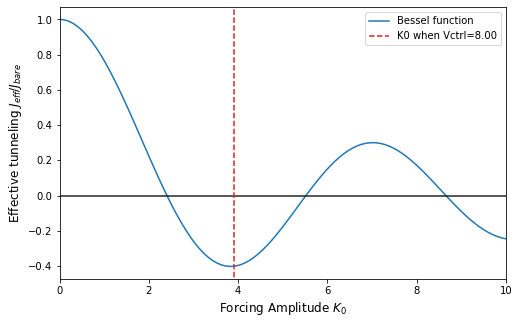

In [5]:
k_list = np.linspace(0,10,100)
jv_list = jv(0,k_list)

fig = plt.figure(figsize=[8,5])
plt.plot(k_list,jv_list,label='Bessel function')
plt.xlabel(r'Forcing Amplitude $K_0$',fontsize=12)
plt.ylabel(r'Effective tunneling $J_{eff}/J_{bare}$',fontsize=12)
plt.axhline(y=0,xmin=0,xmax=10,color="#222222")
plt.xlim(0,10)
plt.axvline(x=K0,ymin=-0.5,ymax=2,color="#dd2222",linestyle='--',label='K0 when Vctrl=%.02f'%(controlVoltageToAM))
plt.legend()

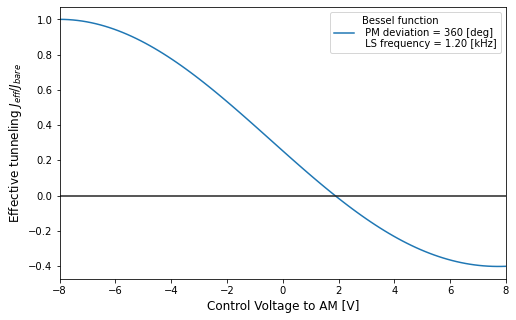

In [7]:
controlVoltage_list = np.linspace(-8,8,100)
dy_list =(controlVoltage_list*bufferAmpForAM+1)/2*modulationSignalVpp*bufferAmpForFM/5*PMdeviation/360*dl
k_list =  2*np.pi*mrb*dl*Omega*dy_list/(constants.h)
jv_list = jv(0,k_list)


fig = plt.figure(figsize=[8,5])
plt.plot(controlVoltage_list,jv_list,label='Bessel function \n PM deviation = %3d [deg] \n LS frequency = %.02f [kHz]'%(PMdeviation, Omega/(2*np.pi*1e03)))
plt.xlabel(r'Control Voltage to AM [V]',fontsize=12)
plt.ylabel(r'Effective tunneling $J_{eff}/J_{bare}$',fontsize=12)
plt.axhline(y=0,xmin=0,xmax=10,color="#222222")
plt.xlim(np.min(controlVoltage_list),np.max(controlVoltage_list))
# plt.axvline(x=K0,ymin=-0.5,ymax=2,color="#dd2222",linestyle='--',label='K0 when Vctrl=%.02f'%(controlVoltageToAM))
plt.legend()